In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# importing dataset 

data = pd.read_csv("E:\Datasets\loan_data_set.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
data.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
#Lets see what are the different kind of values that each of these categorical columns hold in the dataset
#CATEGORICAL VALUES : 
print("___________________CATEGORICAL VARIABLES ________________________________")
print("Gender: ", data['Gender'].unique())
print("Married: ",data['Married'].unique())
print("Loan_Status: ", data["Loan_Status"].unique())
print("Self Employed: ", data["Self_Employed"].unique())
print("Credit History: ", data["Credit_History"].unique())


#ORDINAL VALUES - Because they are categorical in nature and their categorical values have weightage among themselves.
print("____________________ORDINAL VARIABLES ____________________________________")
print("Dependents: ", data["Dependents"].unique())
print("Education: ",data["Education"].unique())
print("Property_Area: ", data["Property_Area"].unique())


#NUMERICAL VALUES :
print("___________________NUMERICAL VARIABLES___________________________________")
print("Loan_ID")
print("ApplicantIncome")
print("CoapplicantIncome")
print("LoanAmount")
print("Loan_Amount_Term")

___________________CATEGORICAL VARIABLES ________________________________
Gender:  ['Male' 'Female' nan]
Married:  ['No' 'Yes' nan]
Loan_Status:  ['Y' 'N']
Self Employed:  ['No' 'Yes' nan]
Credit History:  [ 1.  0. nan]
____________________ORDINAL VARIABLES ____________________________________
Dependents:  ['0' '1' '2' '3+' nan]
Education:  ['Graduate' 'Not Graduate']
Property_Area:  ['Urban' 'Rural' 'Semiurban']
___________________NUMERICAL VARIABLES___________________________________
Loan_ID
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.shape

(614, 13)

In [8]:
data.size

7982

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There seems to be some amount of null values in the dataset. we will be handling them later in the analysis.

## Univariate Analysis

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [10]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# Normalise can be set to true to print the proportions instead of Numbers.
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

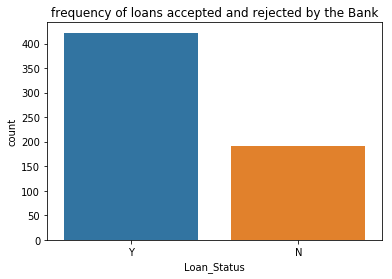

In [12]:
plt.title("frequency of loans accepted and rejected by the Bank")
sns.countplot(data['Loan_Status'])
plt.show()

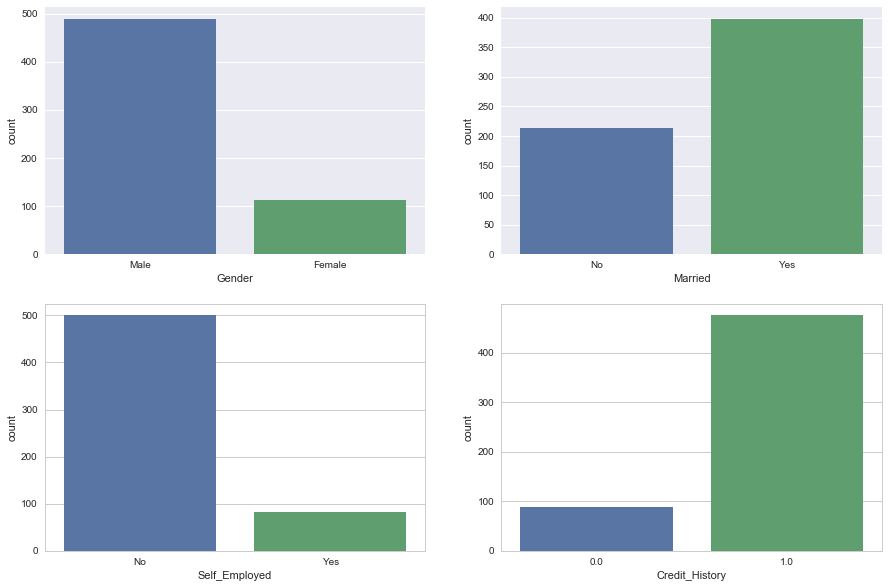

In [13]:
# ANALYSING CATEGORICAL VARIABLES

sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.countplot(x= "Gender", data=data)

plt.subplot(222)
sns.countplot(x="Married", data= data)

sns.set(style="whitegrid")
plt.subplot(223)
sns.countplot(x="Self_Employed", data=data)

plt.subplot(224)
sns.countplot(x="Credit_History", data=data)


Inference : 
* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

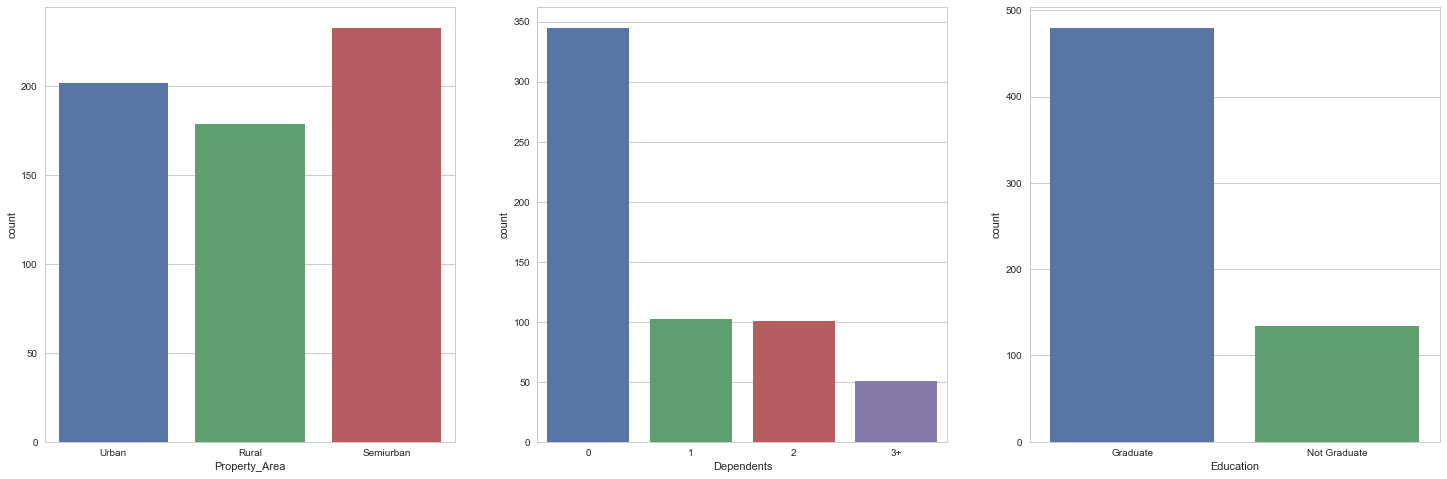

In [14]:
#ANALYSING ORDINAL VARIABLES

plt.figure(figsize=(25,8))

plt.subplot(131)
sns.countplot(x="Property_Area", data=data)

plt.subplot(132)
sns.countplot(x="Dependents", data=data)

plt.subplot(133)
sns.countplot(x="Education", data=data)

Inference :
* Most of the applicants don’t have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

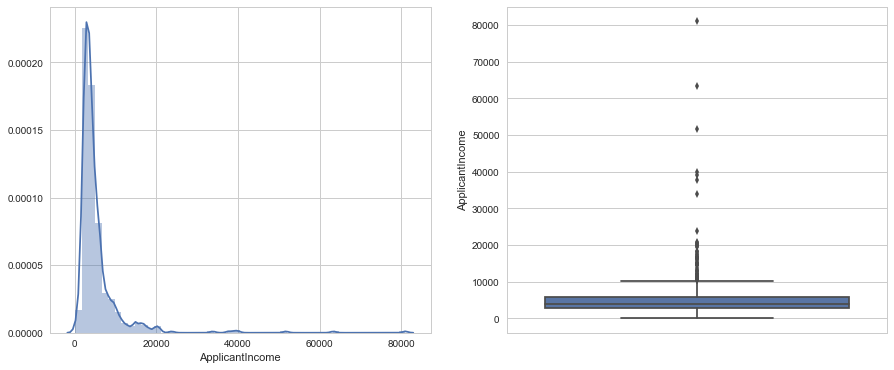

In [15]:
# ANALYSING NUMERICAL VARIABLES
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.distplot(data["ApplicantIncome"])

plt.subplot(122)
sns.boxplot(y=data["ApplicantIncome"])
plt.show()

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society

Text(0.5,0.98,'')

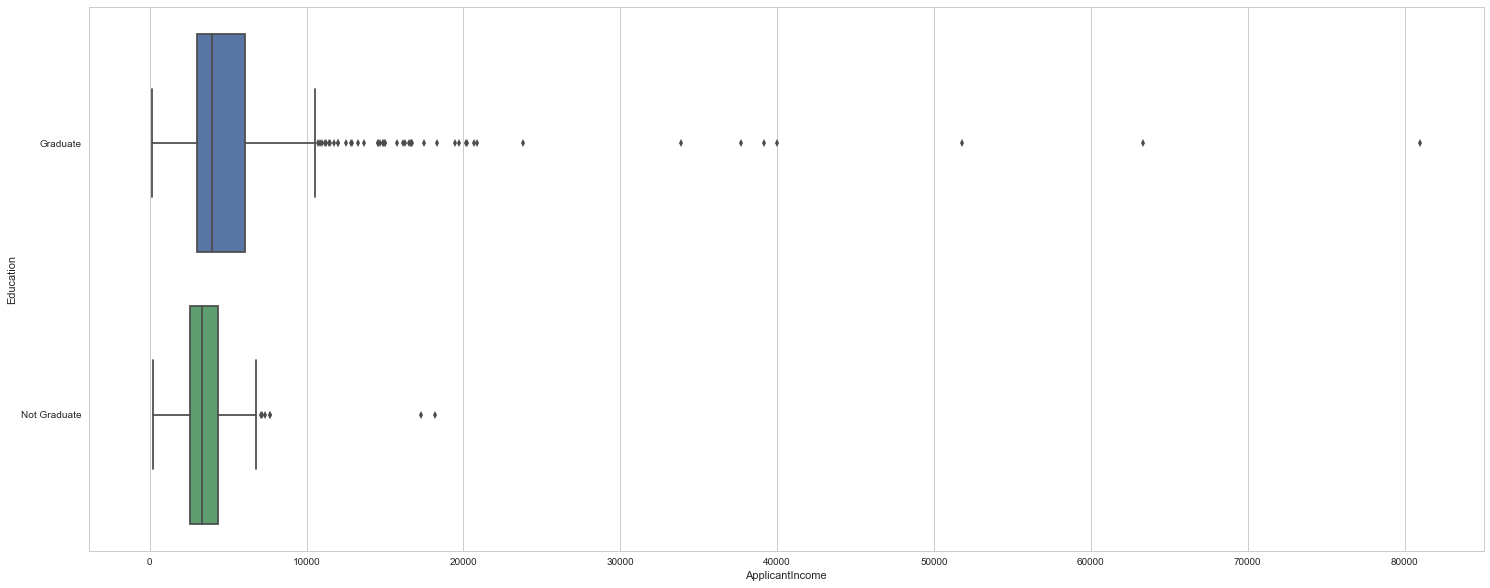

In [16]:
plt.figure(figsize=(25,10))

# sns.boxplot(column=data["ApplicantIncome"], by=data["Education"])
sns.boxplot(data["ApplicantIncome"], data["Education"])
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

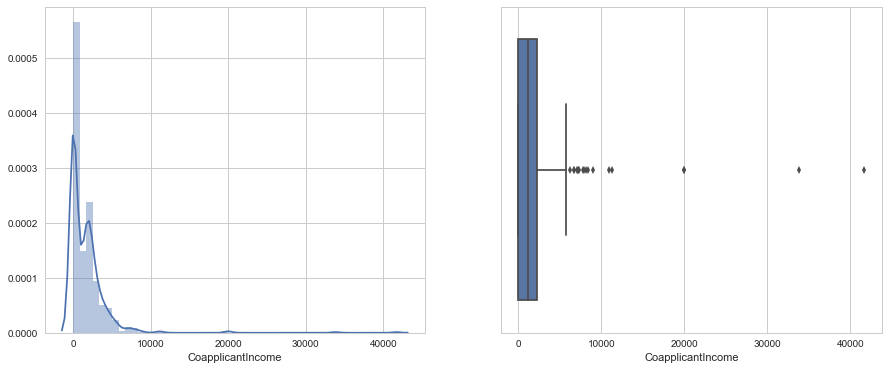

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])

plt.subplot(122)
sns.boxplot(data["CoapplicantIncome"])

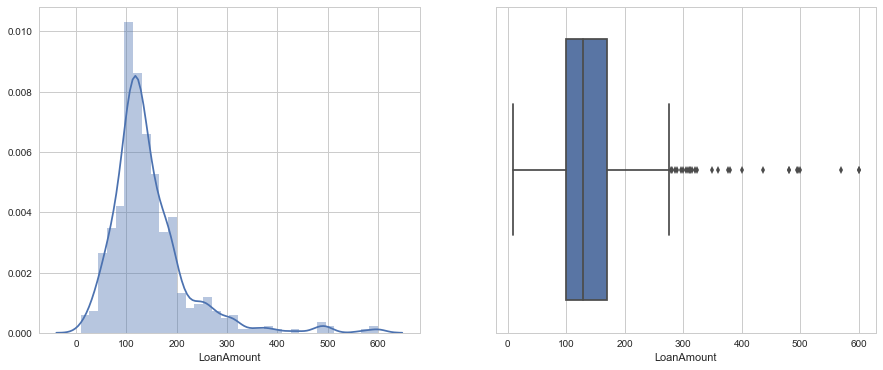

In [18]:
plt.figure(figsize=(15,6))
data_without_null_vals = data.dropna()
plt.subplot(121)
sns.distplot(data_without_null_vals["LoanAmount"])

plt.subplot(122)
sns.boxplot(data_without_null_vals["LoanAmount"])

We see a lot of outliers in this variable and the distribution is fairly normal.

The major chunk of data falls on the left side of the plot and, due to the outliers, the right side of the distribution is too weak and lengthy. This is called as RIGHT SKEWNESS..

## Data cleaning : 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that there are missing values in 'Gender','Married', 'Dependennts', 'Self_Employed', LoanAmount', 'Loan_Amount_Term', 'Credit_History'

So, we can fill them in the following way : 
* Numerical variables : Imputation using median or mean values
* Categorical variables : Imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [21]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [22]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Lets see how to fix the null values present in LoanAmount and Loan_Amount_Term

In [23]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

since most of the applications have '360' days as the Loam_Amount_Term, lets fix these null values with '360' as its values.

In [24]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)

In [25]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

we can infix the medium value for LoanAmount

In [26]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

In [27]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

SO, the data is cleaned with no null values left. 

## TACKLING THE OUTLIER ISSUE 

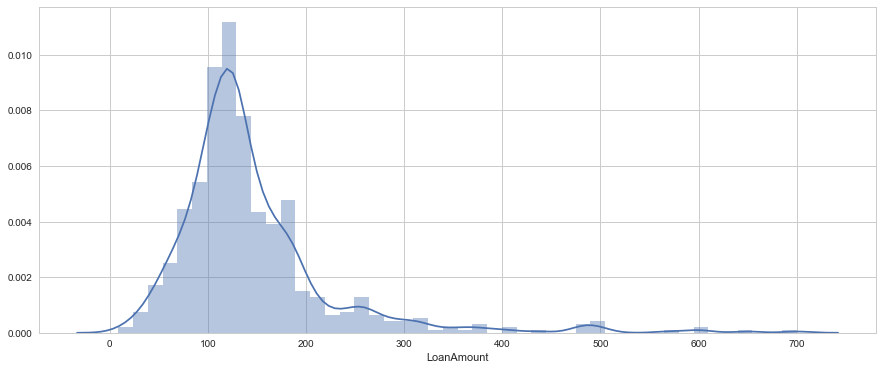

In [28]:
plt.figure(figsize=(15,6))
sns.distplot(data["LoanAmount"])
plt.show()

The plot is right skewed! one way to tackle this issue is by doing log transformation. 

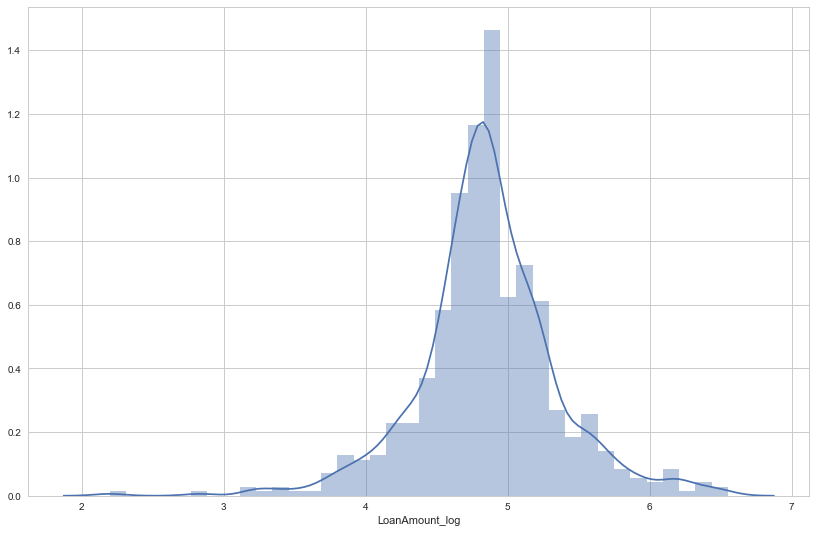

In [29]:
plt.figure(figsize=(14,9))
data['LoanAmount_log']=np.log(data['LoanAmount'])
sns.distplot(data['LoanAmount_log'])
plt.show()

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

## Bivariate Analysis

Here, we will find the relation between target variable and categorical independent variables.

In [30]:
gender = pd.crosstab(data['Gender'], data['Loan_Status'])

Text(0.5,1,'Plot showing the QANTITY OF PEOPLE whose loan got sanctioned or not - wrt gender')

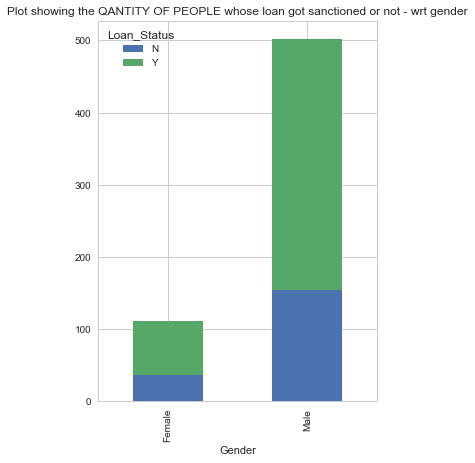

In [31]:
gender.plot(kind="bar", stacked=True,figsize=(5,7))
plt.title("Plot showing the QANTITY OF PEOPLE whose loan got sanctioned or not - wrt gender")

Text(0.5,1,'Scaling is done to COMPARE THE PERCENTAGE OF PEOPLE WHOSE LOAN IS SANCTIONED OR NOT - wrt Gender')

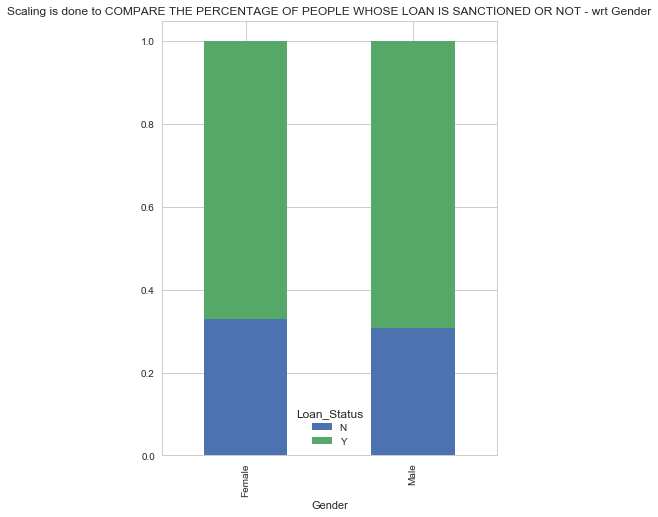

In [32]:
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(6,8))
plt.title("Scaling is done to COMPARE THE PERCENTAGE OF PEOPLE WHOSE LOAN IS SANCTIONED OR NOT - wrt Gender")

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

# Visuvalising other categorical values 

In [33]:
education = pd.crosstab(data['Education'], data['Loan_Status'])
married = pd.crosstab(data['Married'], data['Loan_Status'])
dependents = pd.crosstab(data['Dependents'], data['Loan_Status'])
self_employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])

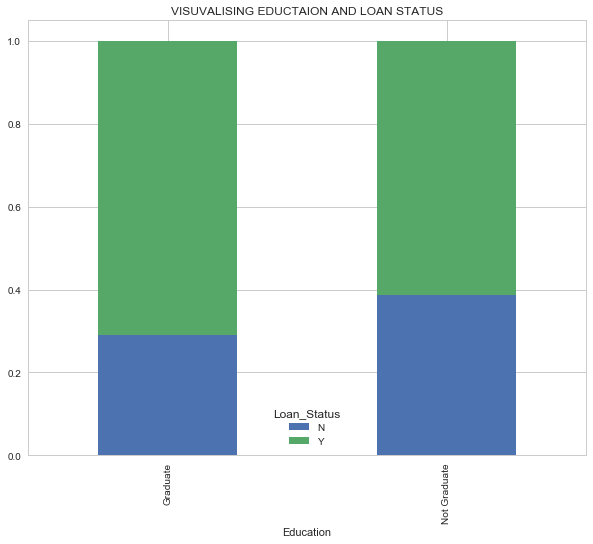

In [34]:
education.div(education.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("VISUVALISING EDUCTAION AND LOAN STATUS")
plt.show()

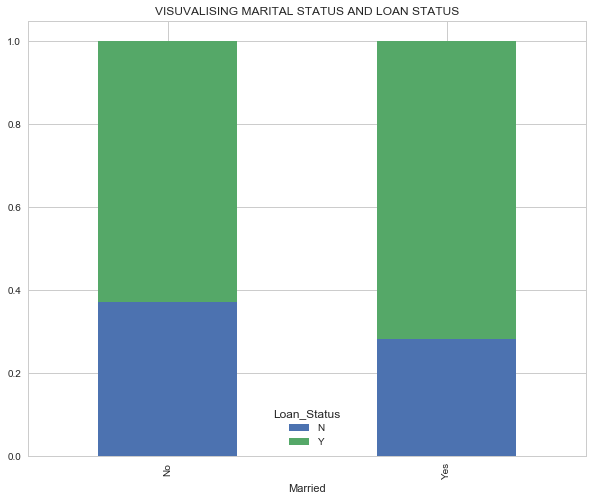

In [35]:
married.div(married.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("VISUVALISING MARITAL STATUS AND LOAN STATUS")
plt.show()

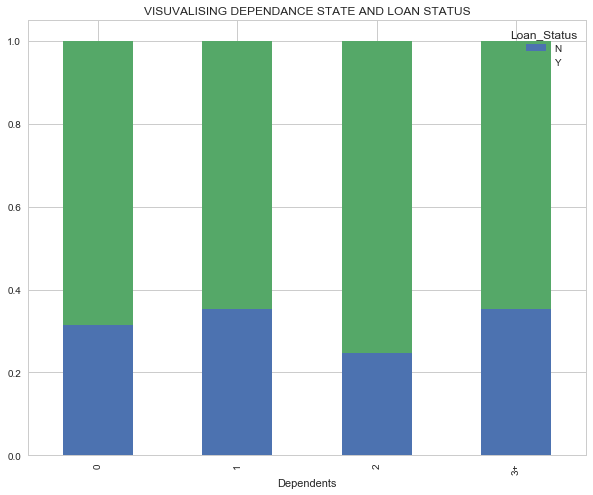

In [36]:
dependents.div(dependents.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("VISUVALISING DEPENDANCE STATE AND LOAN STATUS")
plt.show()

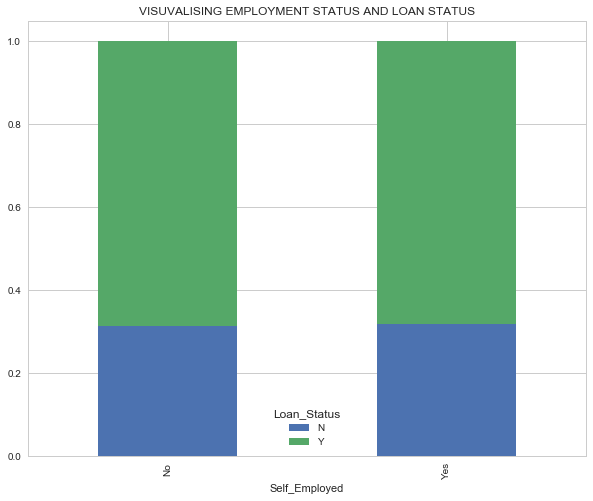

In [37]:
self_employed.div(self_employed.sum(1).astype("float"), axis=0).plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("VISUVALISING EMPLOYMENT STATUS AND LOAN STATUS")
plt.show()

Inference: 
* Proportion of married applicants is higher for approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar for both Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

#### Lets look at the relationship between other categoricla variables

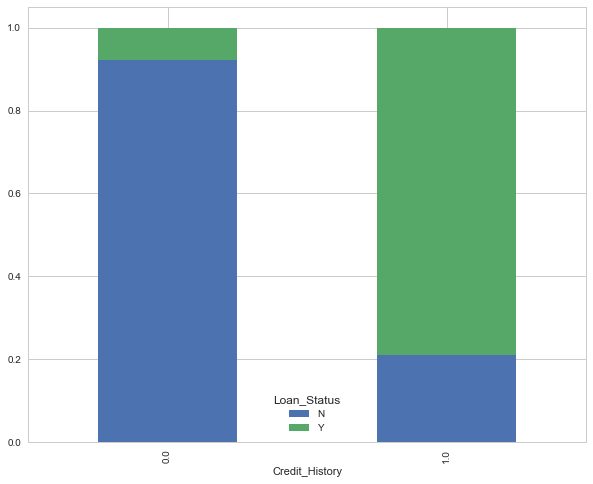

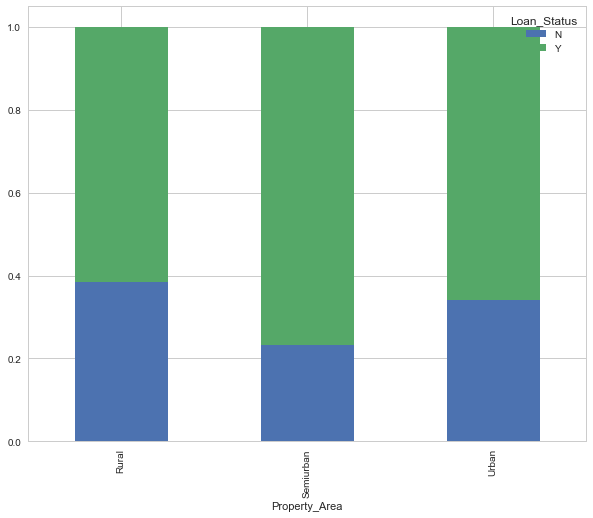

In [38]:
credit_history = pd.crosstab(data["Credit_History"], data['Loan_Status'])
property_area = pd.crosstab(data["Property_Area"], data['Loan_Status'])

credit_history.div(credit_history.sum(1).astype("float"), axis = 0).plot(kind="bar", stacked=True, figsize=(10, 8))
property_area.div(property_area.sum(1).astype("float"), axis=0).plot(kind="bar", stacked=True, figsize=(10,8))

Inference :
* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Visuvalising Numerical values 

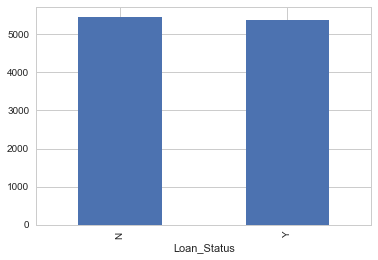

In [39]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

### Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [40]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average', 'High','Very high']
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,right=True,labels=group)

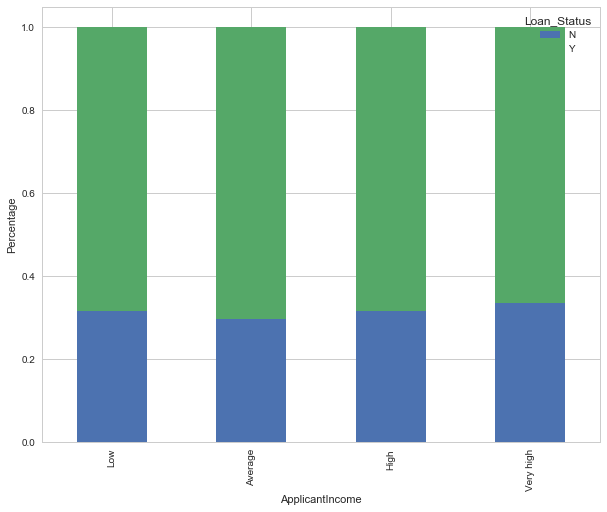

In [41]:
Income_bin=pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10, 8))
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

### It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

In [42]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
data['Coapplicant_Income_bin']=pd.cut(data['CoapplicantIncome'],bins,include_lowest=True,labels=group)

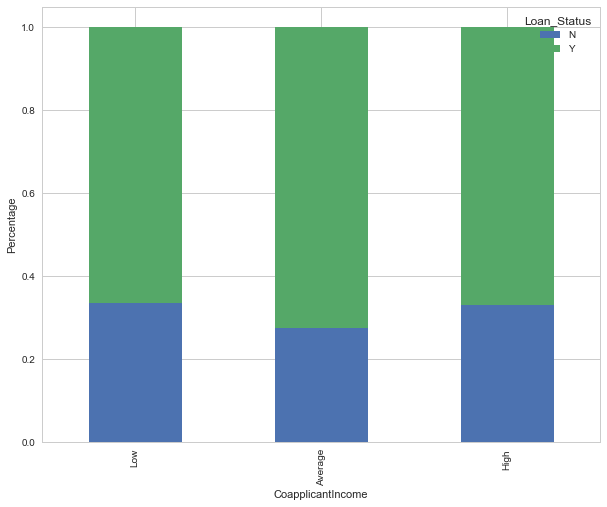

In [43]:
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10, 8))
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

### It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [44]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']

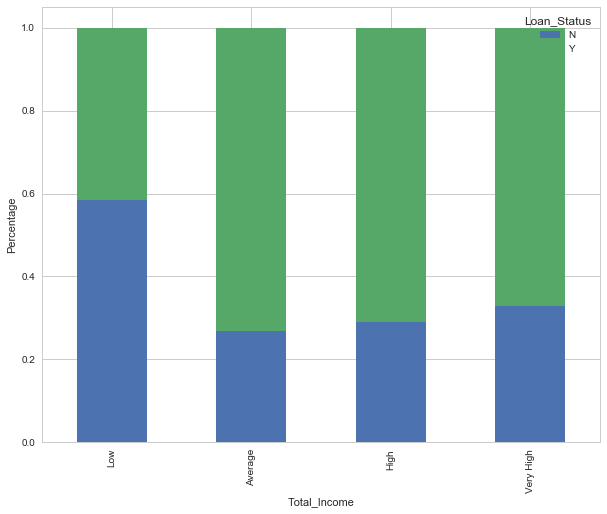

In [45]:
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10, 8))
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

### we can see that propotion of people having their loan approved with less income is less when compared to people with Average, high and very high income 

In [46]:
groups = ['low','avergae','high']
bins = [0,100,200,700]
data['loan_amount_bin'] = pd.cut(data['LoanAmount'],bins, labels=groups)

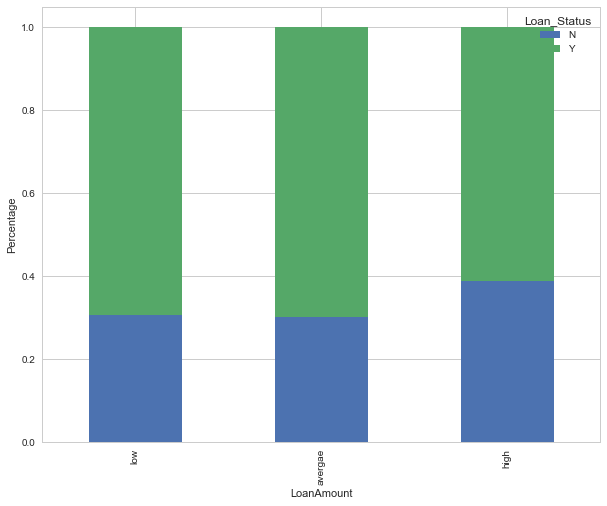

In [47]:
data_loan_amount=pd.crosstab(data['loan_amount_bin'],data['Loan_Status'])
data_loan_amount.div(data_loan_amount.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,8))
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

### It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [48]:
# Let’s drop the bins which we created for the exploration part.

data = data.drop(['loan_amount_bin', 'Total_Income', 'Total_Income_bin', 'Coapplicant_Income_bin', 'Income_bin', 'LoanAmount_log'], axis=1)

In [49]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [50]:
# We will change the 3+ in dependents variable to 3 to make it a numerical variable.

data['Dependents'].replace('3+', 3, inplace=True)

# we will change 'N' and 'Y' in Loan_Status to binary values

data['Loan_Status'].replace('N', 0, inplace=True)
data['Loan_Status'].replace('Y', 1, inplace=True)

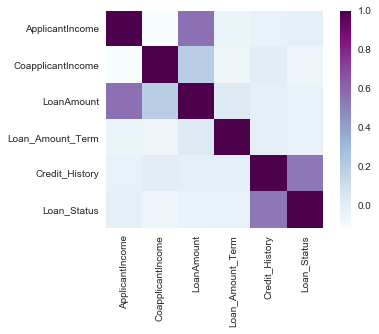

In [51]:
# COORELATION MATRIX 

sns.heatmap(data.corr(), square=True, cmap="BuPu")

## Building a classification model

In [53]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
data=data.drop('Loan_ID',axis=1)

In [55]:
X = data.drop('Loan_Status', axis=1)
y = data.Loan_Status

In [60]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [57]:
X = pd.get_dummies(X)

In [61]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [62]:
data = pd.get_dummies(data)

In [63]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [69]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [70]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization

In [73]:
y_predicted = model.predict(x_train)

In [74]:
accuracy_score(y_train, y_predicted)

0.8228438228438228

our prediction is 82% correct

In [76]:
test_predicted = model.predict(x_test)

In [77]:
test_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)